# Critical surface density

The critical surface density is defined as

$$\Sigma_{cr}=\frac{c^2}{4\pi G}\frac{D_S}{D_{LS}D_{L}} $$

The scaling of the critical surface density with redshift is modulated by $D_S/D_{LS}D_L$, implying the the convergence

$$ \kappa=\frac{\Sigma}{\Sigma_{cr}} $$ 

scales with source redshift as the so called "***Lensing Distance***":

(array([  0.,   2.,   4.,   6.,   8.,  10.]),
 <a list of 6 Text xticklabel objects>)

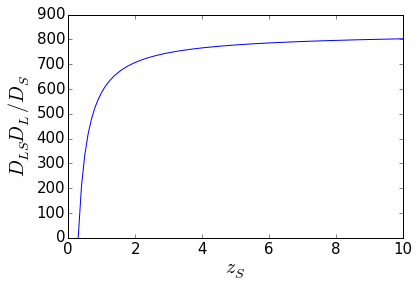

In [1]:
%matplotlib inline
import numpy as np
from astropy import constants as const
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

zl=0.3
zs=np.linspace(zl,10.0,100)
dl=cosmo.angular_diameter_distance(zl)
ds=cosmo.angular_diameter_distance(zs)
dls=[]
for i in range(ds.size):
    dls.append(cosmo.angular_diameter_distance_z1z2(zl,zs[i]).value)
plt.plot(zs,dls*dl/ds,'-')
plt.ylabel('$D_{LS}D_L/D_S$',fontsize=20)
plt.xlabel('$z_S$',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

It is interesting to note where a lens with a given surface density distribution reaches the maximum convergence: 

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text xticklabel objects>)

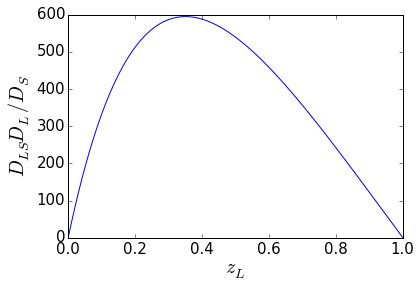

In [2]:
zl=np.linspace(0.0,1.0,100)
zs=1.0
dl=cosmo.angular_diameter_distance(zl)
ds=cosmo.angular_diameter_distance(zs)
dls=[]
for i in range(dl.size):
    dls.append(cosmo.angular_diameter_distance_z1z2(zl[i],zs).value)
plt.plot(zl,dls*dl/ds,'-')
plt.ylabel('$D_{LS}D_L/D_S$',fontsize=20)
plt.xlabel('$z_L$',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

The plot shows that there is an optimal redshift (or distance) between the observer and the lens, where the critical surface density reaches its minimum. In terms of lensing strength, this is the distance which maximizes the lensing effects, because the convergence is highest. 

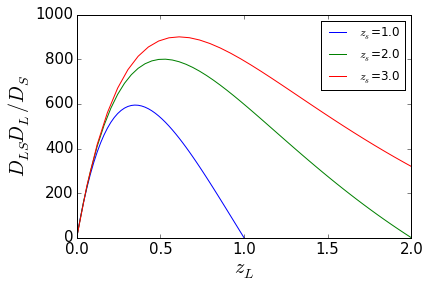

In [3]:
zs=[1.0,2.0,3.0]
ds=cosmo.angular_diameter_distance(zs)
for j in range(ds.size):
    zl=np.linspace(0.0,zs[j])
    dl=cosmo.angular_diameter_distance(zl)
    dls=[]
    for i in range(dl.size):
        dls.append(cosmo.angular_diameter_distance_z1z2(zl[i],zs[j]).value)
    plt.plot(zl,dls*dl/ds[j],'-',label="$z_s$="+str(zs[j]))
plt.xlim([0,2])
plt.ylabel('$D_{LS}D_L/D_S$',fontsize=20)
plt.xlabel('$z_L$',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(loc='best')

Obviously, by pushing the source at higher redshift, the peak also moves with it. Note that the amplitude of the curve is higher, indicating that the critical surface density is lower for more distant sources.

# From the convergence to the lensing potential

We showed that 
$$\Psi(\vec{x})=\frac{1}{\pi}\int\kappa(\vec{x}')\ln{|\vec x-\vec x'|}d^2x'$$
i.e. that the lensing potential is the convolution of the convergence with a kernel function.

Working in Fourier space, this equation can be worked out to produce a map of the potential.

This can be done very easily, using a package called "LensTools":

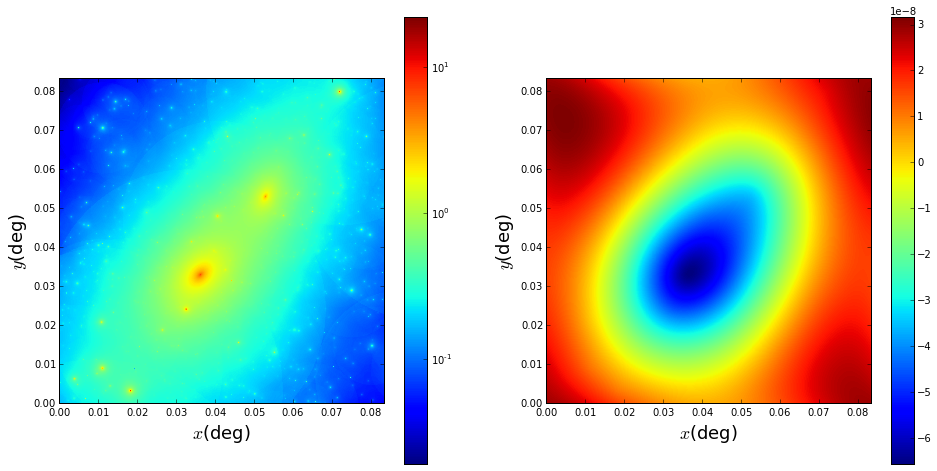

In [10]:
from astropy.io import fits as pyfits
from matplotlib.colors import LogNorm

# the file containing my kappa map (in fits format)
filekappa="/Users/massimo/stiva/FF/RESULTS/common_figs/kappa_test.fits"

#construct a DensityPlane object using my kappa map
from lenstools.simulations import DensityPlane
density=DensityPlane.load(filekappa)

# define two subplots and visualize kappa in the left panel: 
fig,ax = plt.subplots(1,2,figsize=(16,8))
density.visualize(fig,ax[0],colorbar=True, norm=LogNorm())
# compute the potential and visualize it in the right panel:
density.potential().visualize(fig,ax[1],colorbar=True)
plt.show()

As you can see the lensing potential is significantly smoother that the convergence.

Let's get the deflection angles now. Let's do it starting from the potential. A built-in function of LensTools calculate a DeflectionPlane istance. This instance stores the two components of the deflection angle (at any position on the lens plane), which is calculated as the gradient of the potential. 

-37.9163422878 arcsec 28.335102144 arcsec


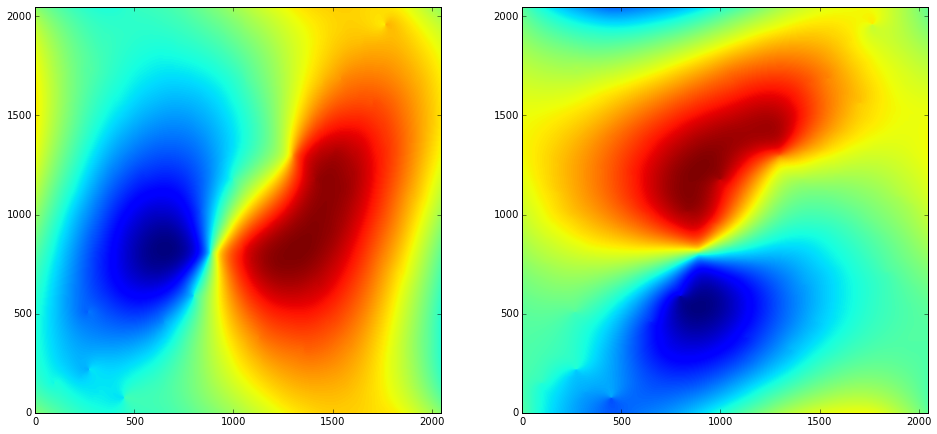

In [27]:
from lenstools.simulations import raytracing 

ang0,ang1=density.potential().deflectionAngles().data # deflectionAngles returns a DeflectionPlane instance
                                                      # data stores two arrays: ang0 and ang1, which are the components of the DA

print np.amin(ang0).to("arcsec"),np.amax(ang1).to("arcsec") # check how big are the deflections

fig,ax = plt.subplots(1,2,figsize=(16,8)) # plot the results in two panels
ax[0].imshow(ang0.value,origin='lower')
ax[1].imshow(ang1.value,origin='lower')


Apart from the main left-right, top-bottom features, some smaller scale fluctuations are now visible.

Let's derive the shear maps now...

rad angle 300.146688 arcsec
-0.311100321997 13.5556149058
-0.311100321996 13.5556149058


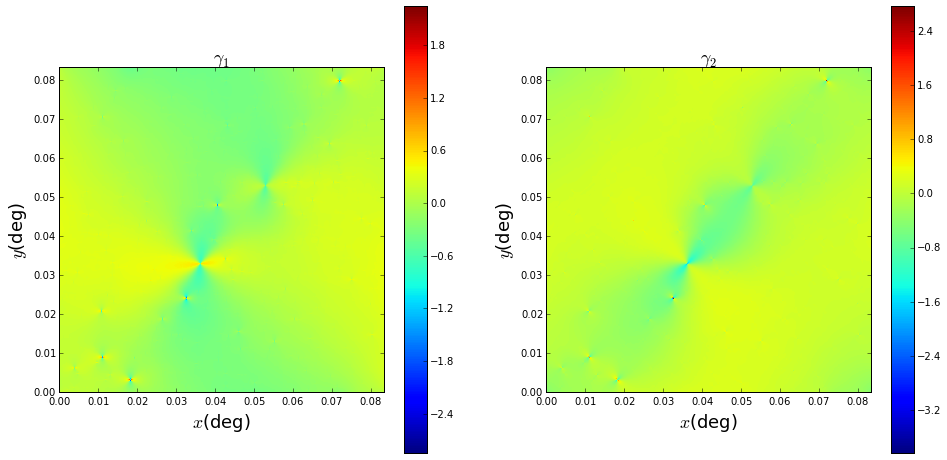

In [6]:
defl=density.potential().deflectionAngles() # this is a DeflectionPlane instance

fig,ax = plt.subplots(1,2,figsize=(16,8))
density.potential().deflectionAngles().shear().visualize(fig,ax,colorbar=True) # the .shear() function returns a ShearMap instance
                                                                # this is visualized in the two panels below
plt.show()

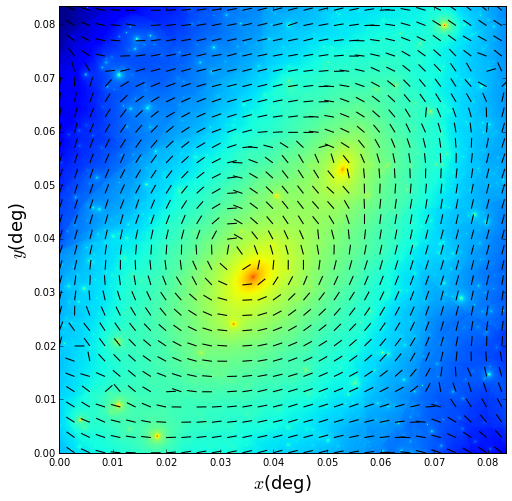

In [26]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
density.visualize(fig,ax,norm=LogNorm())
density.potential().deflectionAngles().shear().sticks(fig,ax,pixel_step=70)

The last plot shows the pattern of the shear pseudo-vector. Notice that it is tangential or radial to the mass distribution.